In [93]:
# Это пример выгрузки, а также обработки некоторых строковых данных и изменение типа

import pandas as pd
import matplotlib.pyplot as plt
import re

def get_num(x):
    f = re.findall(r'[0-9.,]+', x)
    return float(f[0].replace(',', ''))

def get_weight(x):
    if 'ounces' in x.lower():
        return get_num(x) * 28.3495
    if 'pounds' in x.lower():
        return get_num(x) * 453.592
    if x[-1:].lower() == 'g' or x[-5:].lower() == 'grams':
        return get_num(x)
    if 'kilograms' in x.lower():
        return get_num(x) * 1000
    return x

df = pd.read_csv('csv_files/items_new.csv')

df['price'] = df['phone_sale_price'].apply(lambda x: None if x == "Not available" else get_num(x))
df = df[df.price.notna()]
df = df.drop(columns='phone_sale_price')

# df['review_rating'] = df['phone_review_rating'].apply(lambda x: None if x == "Sorry bro" else get_num(x))
# df['discount'] = df['phone_discount'].apply(lambda x: None if x == "Sorry bro" else get_num(x))
# df['list_price'] = df['phone_list_price'].apply(lambda x: None if x == "Sorry bro" else get_num(x))
# df['weight'] = df['phone_weight'].apply(lambda x: None if x == "Sorry bro" else get_weight(x))

df.head()

,phone_full_name,phone_review_rating,phone_rate_number,phone_sale_price,phone_list_price,phone_discount,phone_brand,phone_dim,phone_weight,phone_ASIN,...,phone_cust_rev_4_perc,phone_cust_rev_3_perc,phone_cust_rev_2_perc,phone_cust_rev_1_perc,phone_cust_say,price,review_rating,discount,list_price,weight
0,Samsung Galaxy A55 5G A556E 256GB Dual-SIM GSM...,4.2,269 ratings,$375.90,Sorry bro,0%,SAMSUNG,6.34 x 3.05 x 0.32 inches,10.9 ounces,B0CYHZ11CM,...,Sorry bro,3%,12%,Sorry bro,"{'Phone quality': {'pos_rev': '10', 'neg_rev':...",375.90,4.2,0.0,NaN,309.00955
1,Tracfone | Samsung Galaxy A25 5G | Locked | 12...,4.2,40 ratings,$205.84,Sorry bro,0%,Tracfone,3.05 x 0.32 x 6.38 inches,13.2 ounces,B0CTVZCXCM,...,Sorry bro,3%,Sorry bro,Sorry bro,"{'Screen quality': {'pos_rev': '6', 'neg_rev':...",205.84,4.2,0.0,NaN,374.21340
2,"SAMSUNG Galaxy A16 5G Dual SIM (256GB, 8GB) 6....",3.0,1 rating,$213.99,Sorry bro,0%,SAMSUNG,6 x 4 x 2 inches,14.9 ounces,B0DMTTFB2B,...,Sorry bro,Sorry bro,Sorry bro,Sorry bro,{},213.99,3.0,0.0,NaN,422.40755
3,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,4.3,743 ratings,$199.99,Sorry bro,0%,SAMSUNG,6.57 x 3.07 x 0.35 inches,7.1 ounces,B0BXVKVR98,...,Sorry bro,Sorry bro,2%,Sorry bro,"{'Phone quality': {'pos_rev': '37', 'neg_rev':...",199.99,4.3,0.0,NaN,201.28145
4,Tracfone | Motorola Moto g Power 5G 2024 | Loc...,4.4,21 ratings,$149.00,Sorry bro,0%,Tracfone,Sorry bro,13.5 ounces,B0DFHQ72M3,...,24%,63%,Sorry bro,Sorry bro,"{'Value for money': {'pos_rev': '6', 'neg_rev'...",149.00,4.4,0.0,NaN,382.71825


Пример графиков =)

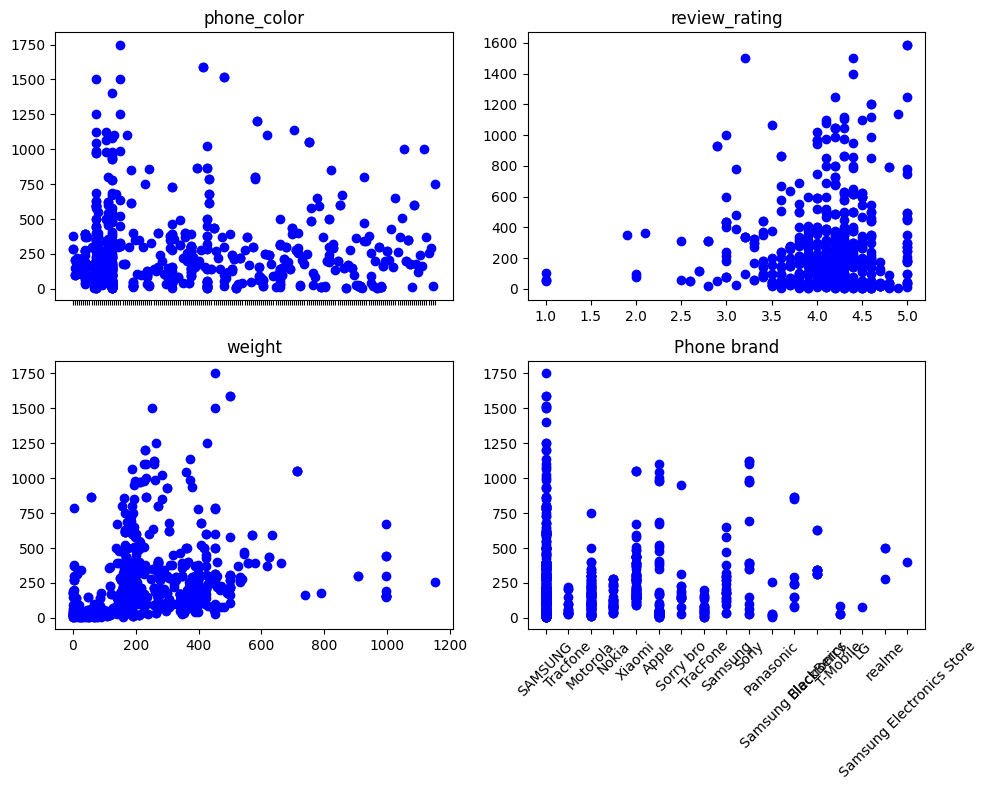

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем данные
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/2)
y4 = x**2

# Создаем 2x2 подграфика
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Рисуем разные функции
ax[1, 1].scatter(df['phone_brand'], df['price'], c='b')
ax[1, 1].set_title('Phone brand')

ax[0, 1].scatter(df['review_rating'], df['price'], c='b')
ax[0, 1].set_title('review_rating')

ax[1, 0].scatter(df['weight'], df['price'], c='b')
ax[1, 0].set_title('weight')

ax[0, 0].scatter(df['phone_color'], df['price'], c='b')
ax[0, 0].set_title('phone_color')
ax[0, 0].tick_params(labelbottom=False) 

plt.xticks(rotation=45)

# Настраиваем макет
plt.tight_layout()
plt.show()


In [139]:
df.sort_values(by='price', ascending=False)[['phone_color', 'price', 'phone_full_name']]

,phone_color,price,phone_full_name
451,Phantom Black,1749.97,"SAMSUNG Galaxy Z Fold 4 Cell Phone, Factory Un..."
205,Titanium Silver Blue,1590.00,SAMSUNG Galaxy ​S25 Ultra 5G 2025 (Internation...
152,Titanium Silver Blue,1590.00,SAMSUNG Galaxy ​S25 Ultra 5G 2025 (Internation...
781,Pink,1519.97,"SAMSUNG Galaxy Z Fold 6 AI Cell Phone, 512GB, ..."
725,Pink,1519.97,"SAMSUNG Galaxy Z Fold 6 AI Cell Phone, 512GB, ..."
...,...,...,...
541,Coral,6.48,"SAMSUNG Galaxy S22+ Silicone Cover, Protective..."
650,Coral,6.48,"SAMSUNG Galaxy S22+ Silicone Cover, Protective..."
631,Clear,6.14,"SAMSUNG Galaxy A03 Soft Clear, Clear"
742,Green,5.99,Samsung Galaxy Z Flip4 Silicone Cover with Rin...
